In [1]:
import pandas as pd
from rodent_loss_src.rnaseq import reads_per_gene_in_condition
#from rodent_loss_src.doapr import merge_human_mouse_readtables
from scipy.stats import zscore

ORGANISMS = ["human", "mouse"]
MIRNAS = ["mir197", "mir769"]
countpath = '/home/felixl/PycharmProjects/rodent_loss/external_data/counts_matrix/{}_counts.matrix'

def rnaseq_long_overview(countpath, mapon='upper_name'):
    all_genes_of_interest = set()
    for organism in ORGANISMS:
        # print(organism)
        # reads_df = reads_per_gene_in_condition(countpath.format(organism))
        for mirna in MIRNAS:
            diffdf = pd.read_csv(f'/home/felixl/PycharmProjects/rodent_loss/milestones/data/rnaseq/{organism}_{mirna}_differential_genes.tsv', sep='\t')
            # display(diffdf)
            if mapon == 'orthomap':
                for orthomap in diffdf.orthomap.values:
                    if isinstance(orthomap, str):
                        all_genes_of_interest.update(orthomap.split('|'))
            elif mapon == 'upper_name':
                all_genes_of_interest.update(diffdf.gene.values)
                all_genes_of_interest.update([gene.upper() for gene in diffdf.gene.values])
                all_genes_of_interest.update([gene.capitalize() for gene in diffdf.gene.values])
                
                
                    
    return all_genes_of_interest


def merge_human_mouse_readtables(countpath, all_genes_of_interest):
    """
    index_key: 
        'name': Ensembl gene name
        'id': Ensembl Gene ID (ENSG...)
    """
    col = []
    for organism in ORGANISMS:
        reads_df = reads_per_gene_in_condition(countpath.format(organism))
        # filter for genes that are significantly down-regulated and predicted as targets in at least one condition
        fildf = reads_df[reads_df.index.isin(all_genes_of_interest)]
        # add information in which organism data was collected
        fildf = fildf.rename(columns=lambda col: f'{organism}_{col}')
        # convert mouse gene names for joining tables
        fildf.index = fildf.index.str.upper()
        # calculate Zscore
        fildf = fildf.apply(zscore, axis=1, nan_policy='propagate')
        col.append(fildf)
    df = col[0].join(col[1], how='outer')
    return df

    
dge_genes = rnaseq_long_overview(countpath)

read_df = merge_human_mouse_readtables(countpath, dge_genes)
display(read_df)

,human_Neg-Ctl_1,human_Neg-Ctl_2,human_Neg-Ctl_3,human_miR-197_1,human_miR-197_2,human_miR-197_3,human_miR-769_1,human_miR-769_2,human_miR-769_3,mouse_CTRL_1,mouse_CTRL_2,mouse_CTRL_3,mouse_CTRL_4,mouse_miR-197_1,mouse_miR-197_2,mouse_miR-197_3,mouse_miR-197_4,mouse_miR-769_1,mouse_miR-769_2,mouse_miR-769_3
name,,,,,,,,,,,,,,,,,,,,
A4GALT,-1.330964,-0.750365,-1.117059,1.541474,0.685854,1.541474,0.044139,-0.353113,-0.261439,1.597398,1.407094,0.836183,1.153356,-0.813116,0.074968,-1.003419,-0.559378,-0.939985,-1.003419,-0.749681
ABHD17C,0.613005,1.537828,0.900019,-0.662612,-1.842559,-0.917736,0.804348,-0.088585,-0.343708,-1.242436,-0.385285,-0.194807,0.376627,-1.194816,-1.242436,0.233768,-0.099568,1.709973,1.757592,0.281388
ACAN,0.177116,1.543438,0.404836,-0.733766,0.177116,0.860277,0.404836,-2.100088,-0.733766,1.412136,1.335427,0.184798,0.836821,-1.349374,-0.658997,-1.311020,-1.387729,-0.122036,0.606695,0.453278
ACCSL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.195893,-0.682465,-1.134283,-0.751976,1.368090,1.263825,0.638231,1.750397,-0.821486,-0.717220,-0.717220
ACOX3,0.486126,0.010568,2.578584,-0.845437,-0.560102,0.105680,-0.464991,-0.655214,-0.655214,0.827268,0.720210,-0.100570,0.327663,0.399035,0.720210,0.827268,0.934327,-1.171152,-1.706444,-1.777816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZFPM1,0.326895,-0.352041,-0.804665,-0.465197,1.005832,1.684768,-0.917822,-1.483602,1.005832,0.545906,2.276152,0.681612,0.613759,-0.030842,0.070937,-0.200474,-0.302253,-1.048634,-1.150413,-1.455750
ZNF385D,0.865004,1.372724,-0.376089,1.259897,-0.094022,0.470111,-1.053048,-0.827395,-1.617181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZNF707,0.197334,0.730137,1.440540,-1.223472,-1.105072,-1.637874,0.374935,0.789337,0.434135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


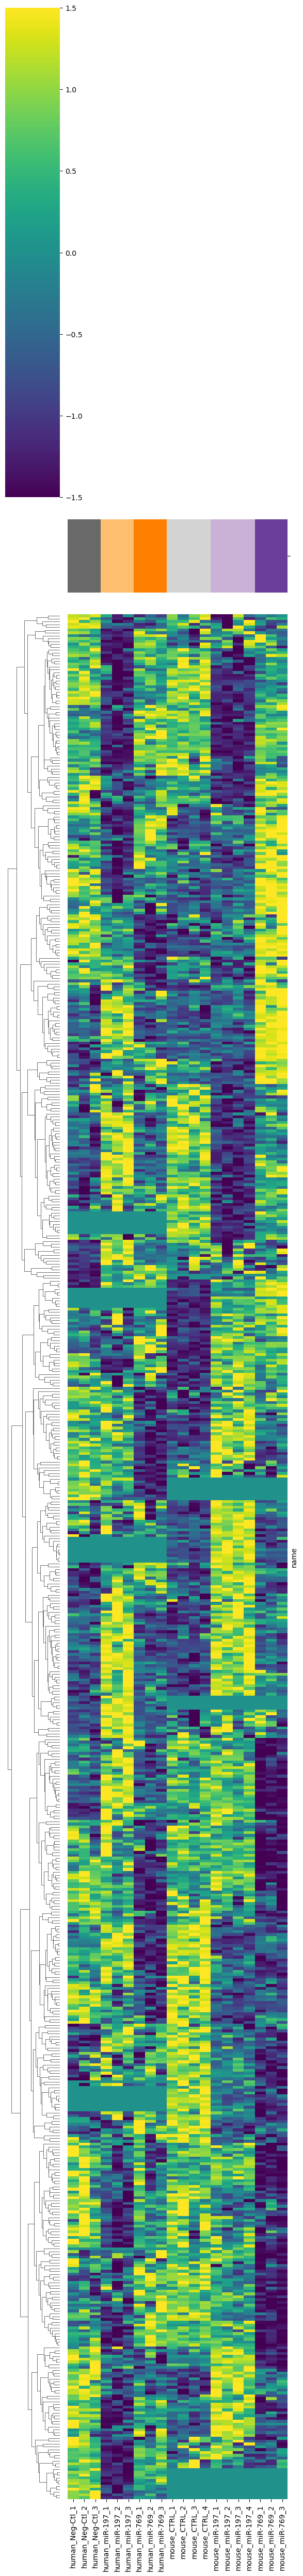

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

palette = sns.color_palette("Paired")
category_to_color = {
    'human|mir197': palette[6],  # light orange
    'human|mir769': palette[7],  # dark orange
    'mouse|mir197': palette[8],  # light purple
    'mouse|mir769': palette[9],  # dark purple
    'human|mouse|mir197' : palette[3],  # green
    'human|control': 'dimgrey',
    'mouse|control': 'lightgrey',
}

def map_gene_to_color(df, category_to_color):
    multiple = set()
    gene2color = {}
    for i, row in df.iterrows():
        name, upper_name, mirna, organism = row
        if upper_name in gene2color:
            multiple.add(upper_name)
            gene2color[upper_name] = category_to_color['human|mouse|mir197']  # only this condition should have duplicates
        else:
            gene2color[upper_name] = category_to_color[f'{organism}|{mirna}']

    assert len(multiple) == 4, f"Expected {'TTPAL', 'ATP6V1A', 'ARMC1', 'CCDC85C'}, but got: {multiple}"

    return pd.Series(gene2color)

def map_condition_to_color(df, category_to_color):
    condition2color = {}
    for col in df.columns:
        if col.startswith('human'):
            organism = 'human'
        else:
            organism = 'mouse'
        if 'miR-197' in col:
            mirna = 'mir197'
        elif 'miR-769' in col:
            mirna = 'mir769'
        else:
            mirna = 'control'
        
        condition2color[col] = category_to_color[f'{organism}|{mirna}']
    return pd.Series(condition2color)

    
masked_nans = read_df.fillna(0)
col_colors = map_condition_to_color(masked_nans, category_to_color)
# row_colors = map_gene_to_color(doapr_df, category_to_color)

sns.clustermap(
    masked_nans, 
    cmap="viridis", 
    # cbar_pos=None,
    col_cluster=False, 
    yticklabels=False, 
    figsize=(6,50), 
    # linewidth=0.05, 
    vmin=-1.5, 
    vmax=1.5, 
    # row_colors=row_colors,
    col_colors=col_colors,
    metric='cosine'
    )
plt.ylabel('')
plt.tight_layout()
plt.show()